In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(URL)

# Display a message and the first few rows of the DataFrame
print('Data downloaded and read into a dataframe!')
df.head()

Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

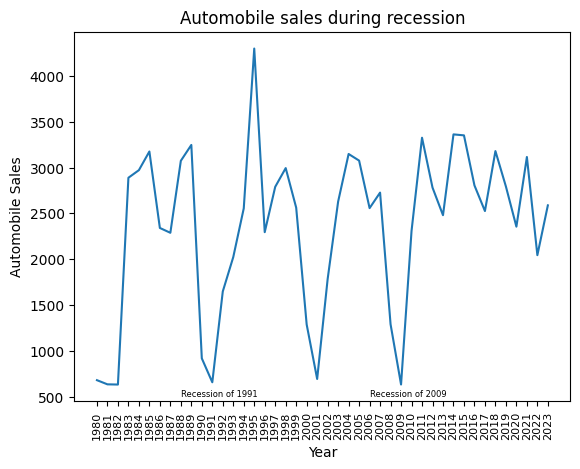

In [43]:
price_data=df.groupby('Year')['Automobile_Sales'].mean()
price_data.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile sales during recession')
plt.xticks(list(range(1980,2024)),rotation=90,fontsize=8)
plt.text(1988,500,'Recession of 1991',fontsize=6)
plt.text(2006,500,'Recession of 2009',fontsize=6)
plt.show()

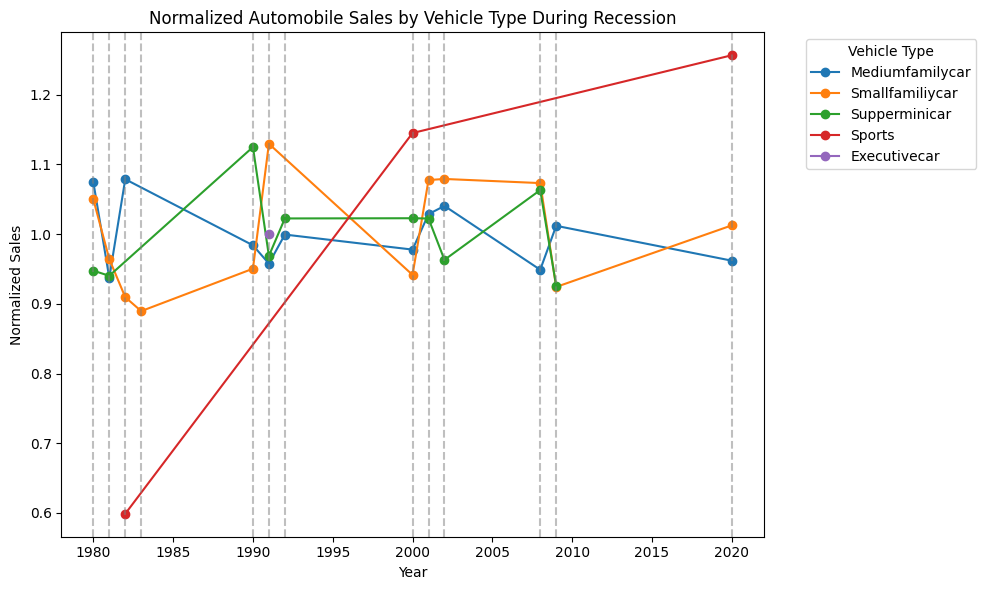

In [49]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())
df_Mline.set_index('Year', inplace=True)
plt.figure(figsize=(10,6))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.tight_layout()
plt.show()



<Figure size 800x500 with 0 Axes>

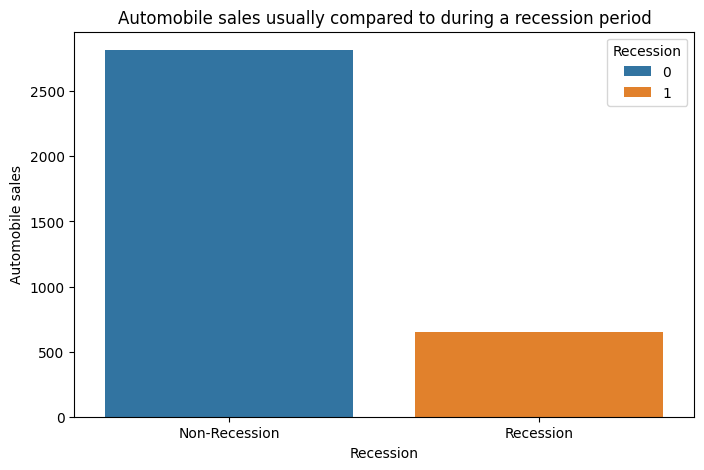

In [61]:
rec_data=df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=rec_data,x='Recession',y='Automobile_Sales',hue='Recession')
plt.xlabel('Recession')
plt.ylabel('Automobile sales')
plt.title('Automobile sales during recession and non-recession periods')
plt.xticks(ticks=[0,1],labels=['Non-Recession','Recession'])
plt.show()

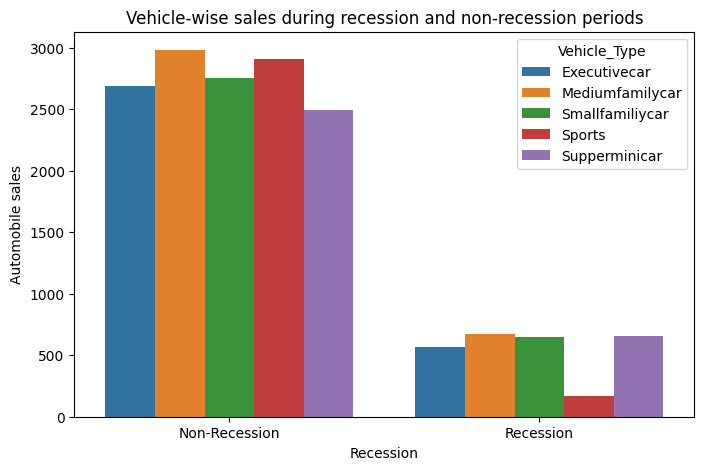

In [66]:
rec_data=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=rec_data,x='Recession',y='Automobile_Sales',hue='Vehicle_Type')
plt.xlabel('Recession')
plt.ylabel('Automobile sales')
plt.title('Vehicle-wise sales during recession and non-recession periods')
plt.xticks(ticks=[0,1],labels=['Non-Recession','Recession'])
plt.show()

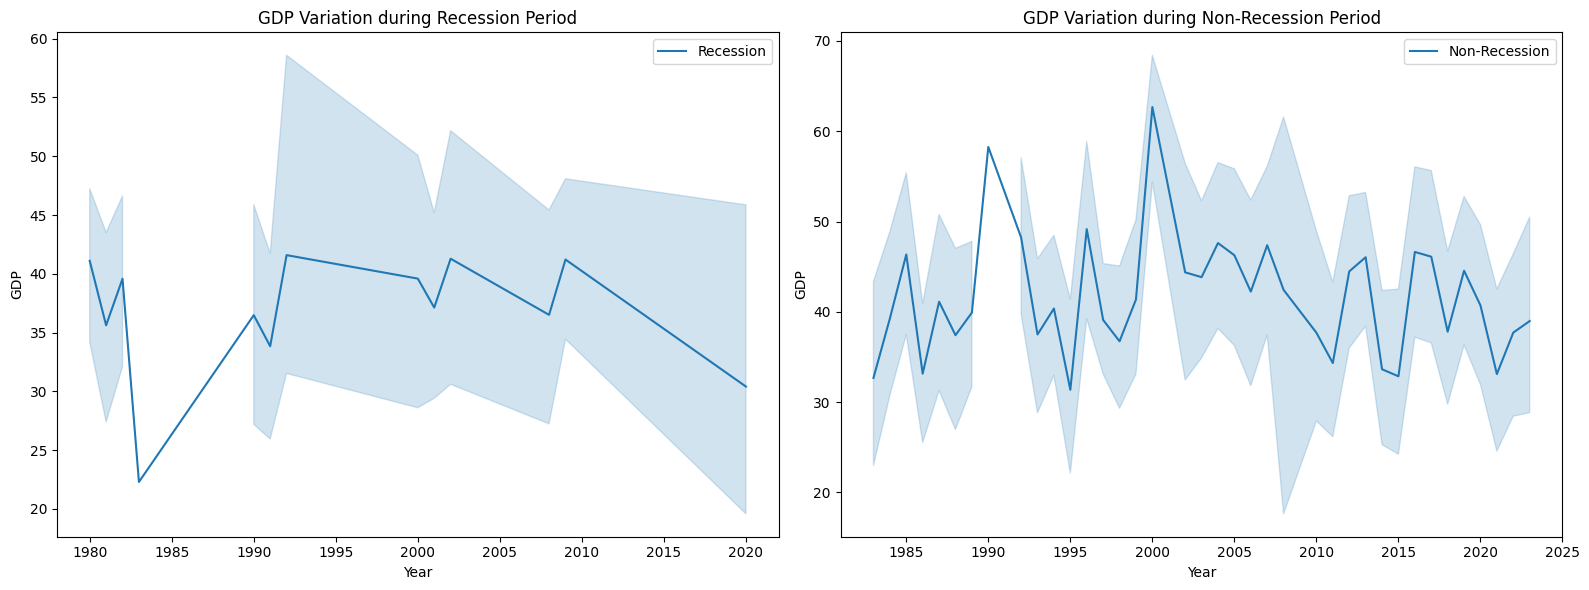

In [91]:
fig=plt.figure(figsize=(16,6))
rec_data=df[df['Recession']==1]
non_rec_data=df[df['Recession']==0]
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
sns.lineplot(data=rec_data,x='Year',y='GDP',label='Recession',ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
sns.lineplot(data=non_rec_data,x='Year',y='GDP',label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
plt.tight_layout()
plt.show()

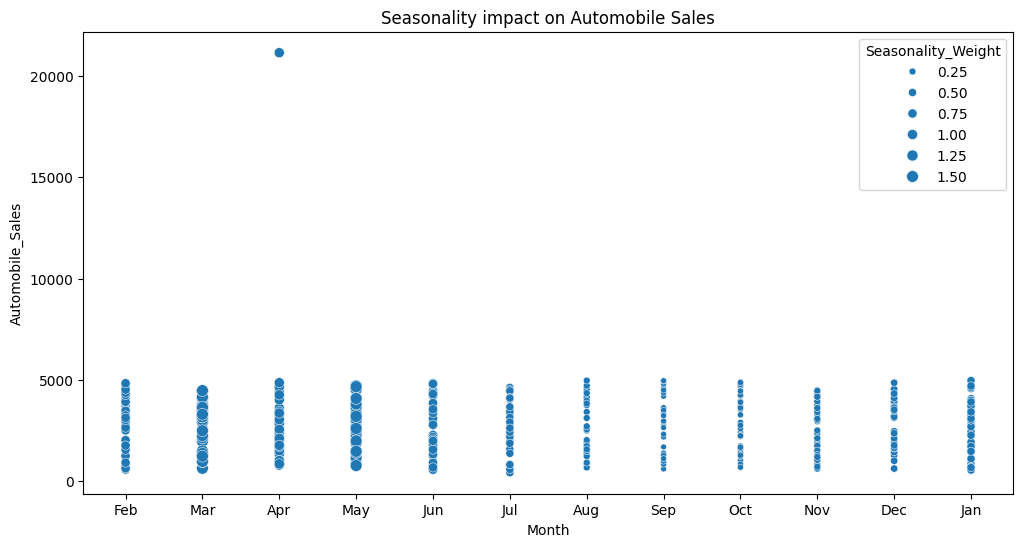

In [95]:
size=non_rec_data['Seasonality_Weight']
plt.figure(figsize=(12,6))
sns.scatterplot(data=non_rec_data,x='Month',y='Automobile_Sales',size=size)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

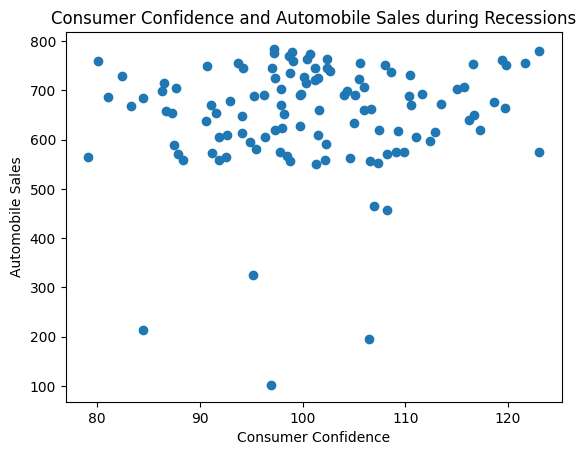

In [97]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])   
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

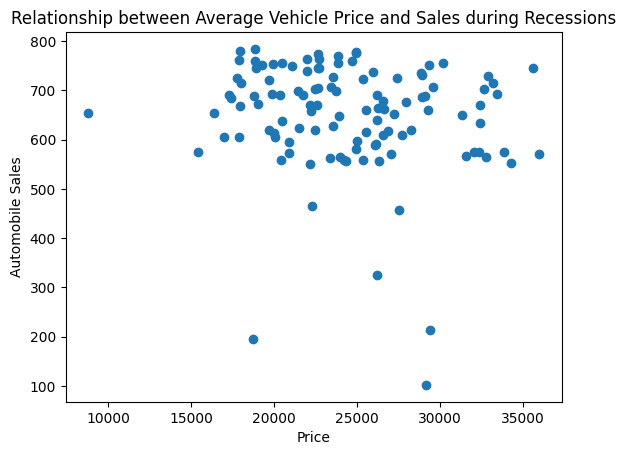

In [99]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

<Figure size 800x600 with 0 Axes>

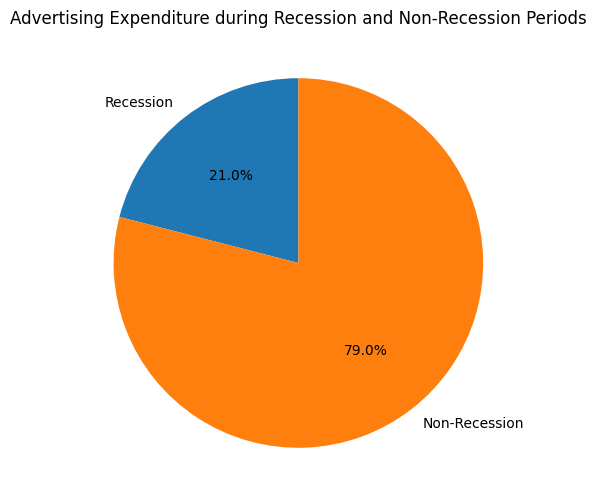

In [102]:
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRtotal = non_rec_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

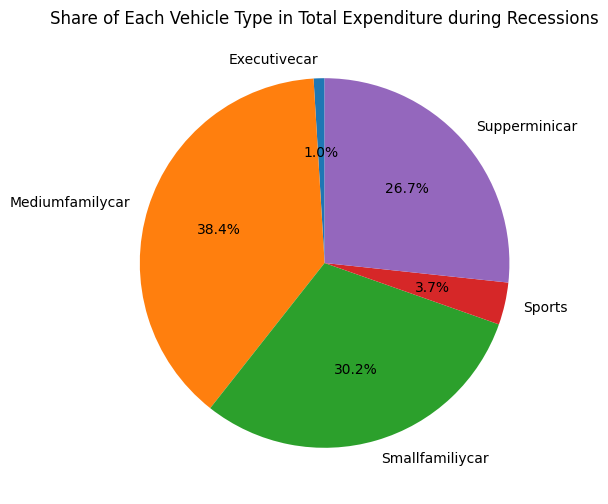

In [104]:
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.show()

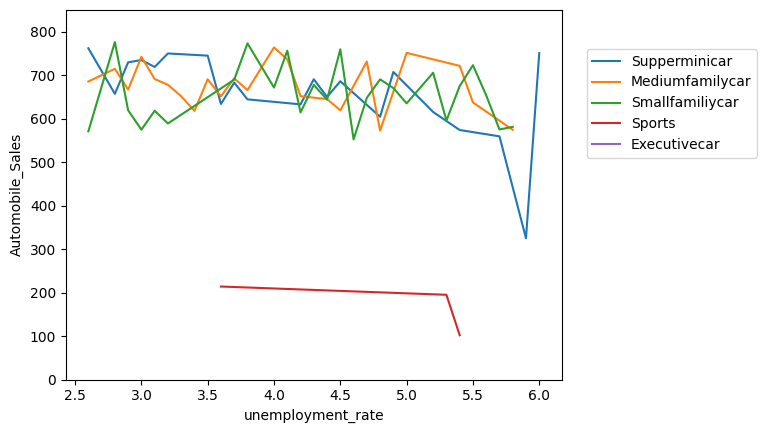

In [115]:
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',hue='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(1.05,0.6))
plt.show()